D:\Anaconda\envs\cursoDeepLearning\Lib\site-packages\scipy\optimize\_differentiable_functions.py:316: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  self.H.update(self.x - self.x_prev, self.g - self.g_prev)


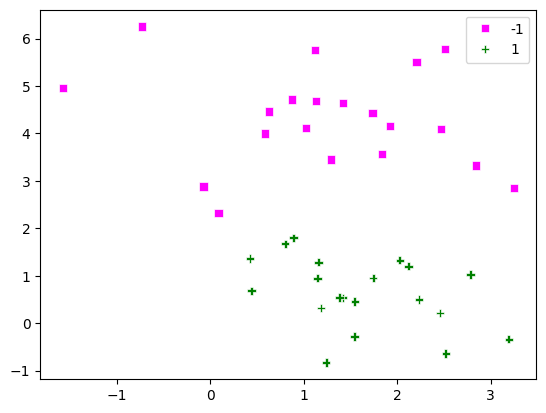

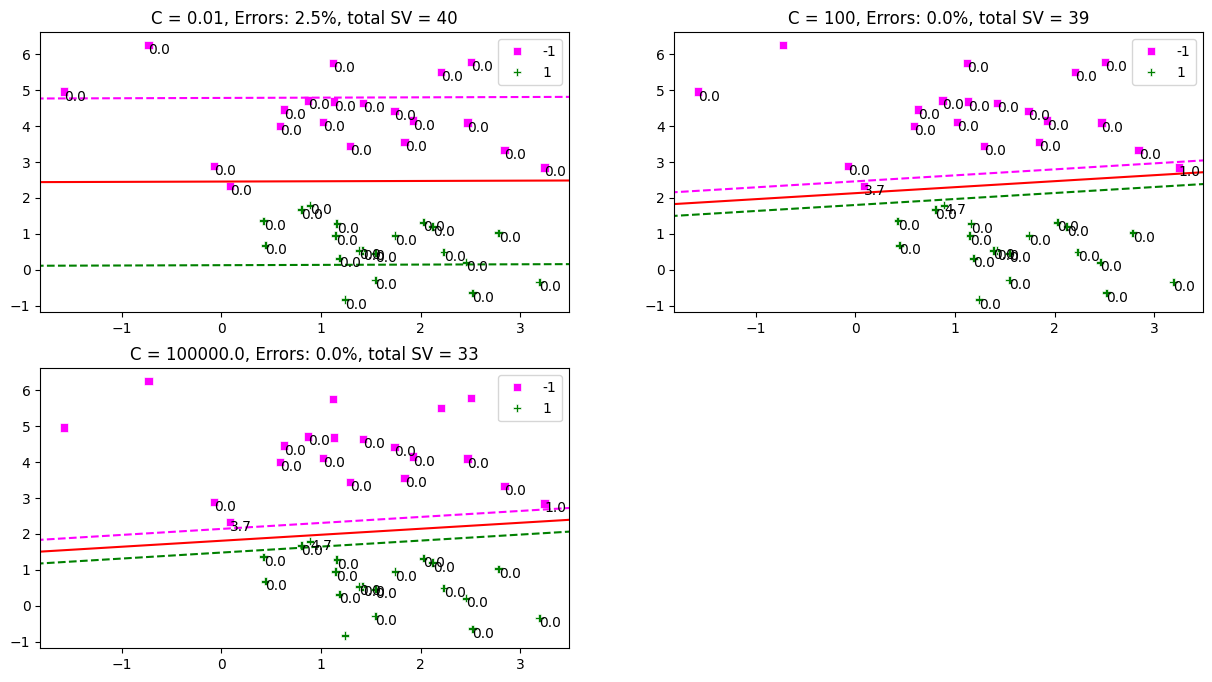

In [1]:
import numpy as np
# For optimization
from scipy.optimize import Bounds, BFGS
from scipy.optimize import LinearConstraint, minimize
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# For generating dataset
import sklearn.datasets as dt

ZERO = 1e-7

def plot_x(x, t, alpha=[], C=0):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], style=t, hue=t, markers=['s', 'P'], palette=['magenta', 'green'])
    if len(alpha) > 0:
        alpha_str = np.char.mod('%.1f', np.round(alpha, 1))
        ind_sv = np.where(alpha > ZERO)[0]
        for i in ind_sv:
            plt.gca().text(x[i, 0], x[i, 1] - .25, alpha_str[i])

# Objective function
def lagrange_dual(alpha, x, t):
    result = 0
    ind_sv = np.where(alpha > ZERO)[0]
    for i in ind_sv:
        for k in ind_sv:
            result += alpha[i] * alpha[k] * t[i] * t[k] * np.dot(x[i, :], x[k, :])
    result = 0.5 * result - sum(alpha)
    return result

def optimize_alpha(x, t, C):
    m, n = x.shape
    np.random.seed(1)
    alpha_0 = np.random.rand(m) * C
    linear_constraint = LinearConstraint(t, [0], [0])
    bounds_alpha = Bounds(np.zeros(m), np.full(m, C))
    result = minimize(
        lagrange_dual, alpha_0, args=(x, t), method='trust-constr',
        hess=BFGS(), constraints=[linear_constraint], bounds=bounds_alpha
    )
    return result.x

def get_w(alpha, t, x):
    w = np.zeros(x.shape[1])
    for i in range(len(x)):
        w += alpha[i] * t[i] * x[i, :]
    return w

def get_w0(alpha, t, x, w, C):
    C_numeric = C - ZERO
    ind_sv = np.where((alpha > ZERO) & (alpha < C_numeric))[0]
    w0 = 0.0
    for s in ind_sv:
        w0 += t[s] - np.dot(x[s, :], w)
    w0 /= len(ind_sv)
    return w0

def classify_points(x_test, w, w0):
    predicted_labels = np.sum(x_test * w, axis=1) + w0
    predicted_labels = np.sign(predicted_labels)
    predicted_labels[predicted_labels == 0] = 1
    return predicted_labels

def misclassification_rate(labels, predictions):
    return np.sum(labels != predictions) / len(labels) * 100

def plot_hyperplane(w, w0):
    x_coord = np.array(plt.gca().get_xlim())
    y_coord = -w0 / w[1] - w[0] / w[1] * x_coord
    plt.plot(x_coord, y_coord, color='red')

def plot_margin(w, w0):
    x_coord = np.array(plt.gca().get_xlim())
    ypos_coord = 1 / w[1] - w0 / w[1] - w[0] / w[1] * x_coord
    plt.plot(x_coord, ypos_coord, '--', color='green')
    yneg_coord = -1 / w[1] - w0 / w[1] - w[0] / w[1] * x_coord
    plt.plot(x_coord, yneg_coord, '--', color='magenta')

def display_SVM_result(x, t, C):
    alpha = optimize_alpha(x, t, C)
    w = get_w(alpha, t, x)
    w0 = get_w0(alpha, t, x, w, C)
    plot_x(x, t, alpha, C)
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    plot_hyperplane(w, w0)
    plot_margin(w, w0)
    plt.xlim(xlim)
    plt.ylim(ylim)
    predictions = classify_points(x, w, w0)
    err = misclassification_rate(t, predictions)
    title = f'C = {C}, Errors: {err:.1f}%'
    title += f', total SV = {np.sum(alpha > ZERO)}'
    plt.title(title)

# Generate sample dataset
dat, labels = dt.make_blobs(n_samples=[20, 20], cluster_std=1, random_state=0)
labels[labels == 0] = -1
plot_x(dat, labels)

# Plotting SVM results for different values of C
fig = plt.figure(figsize=(15, 8))
C_array = [1e-2, 100, 1e5]
for i, C in enumerate(C_array):
    fig.add_subplot(2, 2, 1 + i)
    display_SVM_result(dat, labels, C)

plt.show()

[ 0 -1  1  2  3  0 -1 -3  3]
[ 3  0  2  1  3  0 -1  1  1]


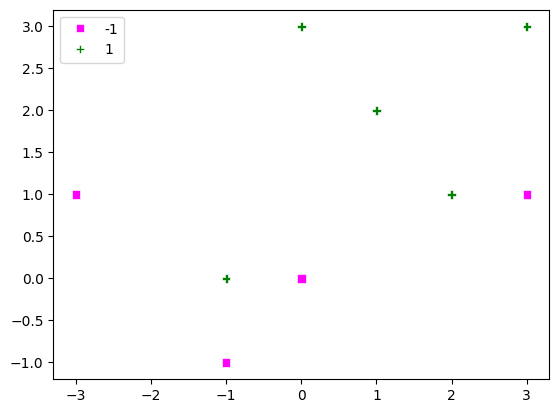

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dat = np.array([[0,3], [-1,0], [1,2], [2,1], [3,3], [0,0], [-1,-1], [-3,1], [3,1]])
labels = np.array([1, 1, 1, 1, 1,-1,-1,-1,-1])

def plot_x(x, t, alpha=[], C=0):
    sns.scatterplot(x=dat[:,0], y=dat[:,1], style=labels, hue=labels, markers=['s','P'], palette=['magenta','green'])
    print(dat[:,0])
    print(dat[:,1])
    if len(alpha) > 0:
        alpha_str = np.char.mod('%.1f', np.round(alpha, 1))
        ind_sv = np.where(alpha > ZERO)[0]
        for i in ind_sv:
            plt.gca().text(dat[i,0], dat[i, 1]-.25, alpha_str[i] )

plot_x(dat, labels)
plt.show()

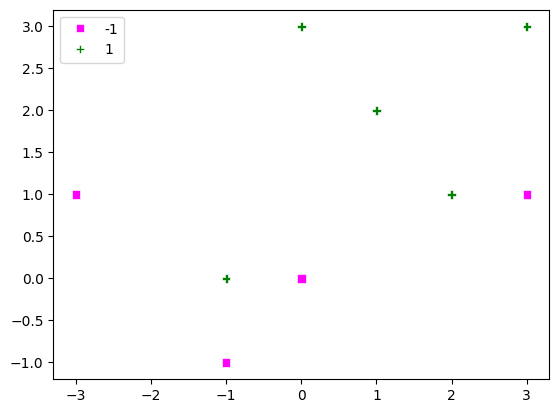

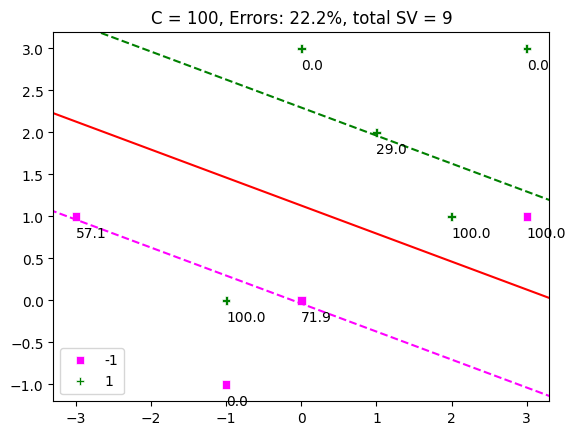

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import minimize, Bounds, LinearConstraint
from scipy.optimize import BFGS

# Constante pequeña
ZERO = 1e-7

# Graficar puntos y alphas si hay
def plot_x(x, t, alpha=[], C=0):
    sns.scatterplot(x=x[:, 0], y=x[:, 1], style=t,
                    hue=t, markers=['s', 'P'], palette=['magenta', 'green'])
    if len(alpha) > 0:
        alpha_str = np.char.mod('%.1f', np.round(alpha, 1))
        ind_sv = np.where(alpha > ZERO)[0]
        for i in ind_sv:
            plt.gca().text(x[i, 0], x[i, 1] - 0.25, alpha_str[i])

# Función objetivo dual (Lagrangiana dual)
def lagrange_dual(alpha, x, t):
    result = 0
    ind_sv = np.where(alpha > ZERO)[0]
    for i in ind_sv:
        for k in ind_sv:
            result += alpha[i] * alpha[k] * t[i] * t[k] * np.dot(x[i, :], x[k, :])
    result = 0.5 * result - sum(alpha)
    return result

# Optimizar alphas
def optimize_alpha(x, t, C):
    m, n = x.shape
    np.random.seed(1)
    alpha_0 = np.random.rand(m) * C
    linear_constraint = LinearConstraint(t, [0], [0])
    bounds_alpha = Bounds(np.zeros(m), np.full(m, C))
    result = minimize(
        lagrange_dual, alpha_0, args=(x, t), method='trust-constr',
        hess=BFGS(), constraints=[linear_constraint], bounds=bounds_alpha
    )
    return result.x

# Calcular vector de pesos
def get_w(alpha, t, x):
    m = len(x)
    w = np.zeros(x.shape[1])
    for i in range(m):
        w += alpha[i] * t[i] * x[i, :]
    return w

# Calcular w0 usando SV con 0 < alpha < C
def get_w0(alpha, t, x, w, C):
    C_numeric = C - ZERO
    ind_sv = np.where((alpha > ZERO) & (alpha < C_numeric))[0]
    w0 = 0.0
    for s in ind_sv:
        w0 += t[s] - np.dot(x[s, :], w)
    w0 = w0 / len(ind_sv)
    return w0

# Clasificación de puntos
def classify_points(x_test, w, w0):
    predicted_labels = np.sum(x_test * w, axis=1) + w0
    predicted_labels = np.sign(predicted_labels)
    predicted_labels[predicted_labels == 0] = 1
    return predicted_labels

# Tasa de error
def misclassification_rate(labels, predictions):
    total = len(labels)
    errors = sum(labels != predictions)
    return errors / total * 100

# Graficar hiperplano
def plot_hyperplane(w, w0):
    x_coord = np.array(plt.gca().get_xlim())
    y_coord = -w0 / w[1] - w[0] / w[1] * x_coord
    plt.plot(x_coord, y_coord, color='red')

# Graficar márgenes
def plot_margin(w, w0):
    x_coord = np.array(plt.gca().get_xlim())
    ypos_coord = 1 / w[1] - w0 / w[1] - w[0] / w[1] * x_coord
    plt.plot(x_coord, ypos_coord, '--', color='green')
    yneg_coord = -1 / w[1] - w0 / w[1] - w[0] / w[1] * x_coord
    plt.plot(x_coord, yneg_coord, '--', color='magenta')

# Mostrar resultados de la SVM
def display_SVM_result(x, t, C):
    alpha = optimize_alpha(x, t, C)
    w = get_w(alpha, t, x)
    w0 = get_w0(alpha, t, x, w, C)
    plot_x(x, t, alpha, C)
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()
    plot_hyperplane(w, w0)
    plot_margin(w, w0)
    plt.xlim(xlim)
    plt.ylim(ylim)
    predictions = classify_points(x, w, w0)
    err = misclassification_rate(t, predictions)
    title = 'C = ' + str(C) + ', Errors: ' + '{:.1f}'.format(err) + '%'
    title += ', total SV = ' + str(len(alpha[alpha > ZERO]))
    plt.title(title)

# Datos de ejemplo
dat = np.array([[0, 3], [-1, 0], [1, 2], [2, 1], [3, 3],
                [0, 0], [-1, -1], [-3, 1], [3, 1]])
labels = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1])

# Mostrar gráfico
plot_x(dat, labels)
plt.show()

# Ejecutar SVM
display_SVM_result(dat, labels, 100)
plt.show()